In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import cosine_similarity
import joblib

In [7]:
df=pd.read_csv("Product.csv")

In [8]:
df.head()

,title,Category,selling_price,product_rating,user_id,links
0,Alisha Solid Women's Cycling Shorts,"""Clothing Women's Clothing Lingerie, Sleep &...",999,5.0,19,https://m.media-amazon.com/images/I/51MmfNZb6T...
1,FabHomeDecor Fabric Double Sofa Bed,"""Furniture Living Room Furniture Sofa Beds &...",32157,3.0,131,/static/img/Image_not_available.png\n
2,AW Bellies,"""Footwear Women's Footwear Ballerinas AW Be...",999,1.6,166,https://m.media-amazon.com/images/I/61DlDX5L0e...
3,Alisha Solid Women's Cycling Shorts,"""Clothing Women's Clothing Lingerie, Sleep &...",699,3.4,12,https://m.media-amazon.com/images/I/51MmfNZb6T...
4,Sicons All Purpose Arnica Dog Shampoo,"""Pet Supplies Grooming Skin & Coat Care Sha...",220,2.9,137,https://m.media-amazon.com/images/I/61OCfq7o8F...


In [9]:
df.shape

(31952, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           31952 non-null  object 
 1   Category        31952 non-null  object 
 2   selling_price   31874 non-null  object 
 3   product_rating  31952 non-null  float64
 4   user_id         31952 non-null  int64  
 5   links           31952 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
df.isna().sum()

title              0
Category           0
selling_price     78
product_rating     0
user_id            0
links              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace=True)

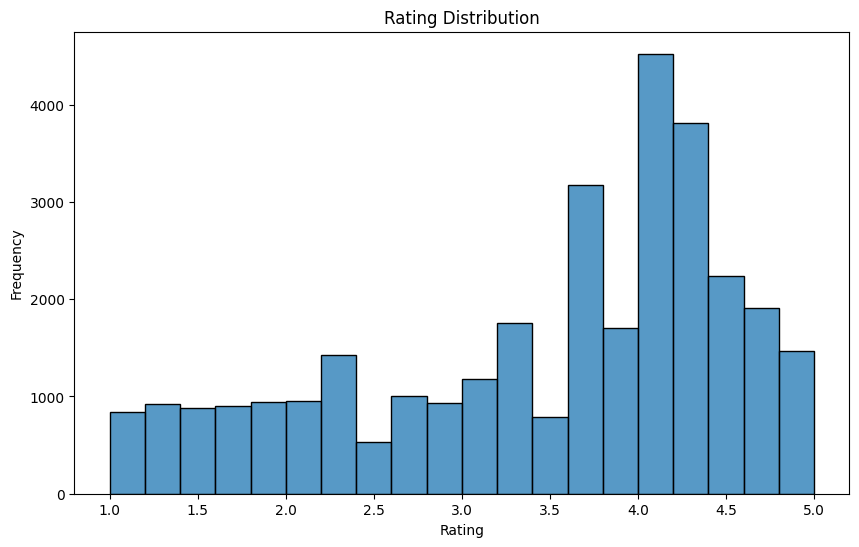

In [15]:
# Visualize rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='product_rating', bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [16]:
num_rating_df=df.groupby('title').count()["product_rating"].reset_index()
num_rating_df.rename(columns={"product_rating":"Num_Rating"},inplace=True)
num_rating_df
num_rating_df

,title,Num_Rating
0,0-DEGREE Solid Men Three Fourths,2
1,1 Stop Fashion Women Printed Crepe Straight Ku...,1
2,"100 Selected Poems, William Wordsworth (Engli...",1
3,109F Solid Women's Tunic,1
4,109f Checkered Women's Regular Skirt,1
...,...,...
23040,zikrefast stylish tuff quality college school ...,1
23041,zo2ra Multi Player Extreme Mini Game Box Store...,1
23042,zone Short For Boys & Girls Casual Printed Hos...,1
23043,zyrah Self-Locking Box Cardboard 6x4x1.5 Inche...,1


In [17]:
num_rating_df.describe()

,Num_Rating
count,23045.000000
mean,1.382860
std,2.348601
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,134.000000


In [18]:
avg_rating_df=df.groupby('title').mean()["product_rating"].reset_index()
avg_rating_df.rename(columns={"product_rating":"Avg_Rating"},inplace=True)
avg_rating_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16988\424859969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df=df.groupby('title').mean()["product_rating"].reset_index()


,title,Avg_Rating
0,0-DEGREE Solid Men Three Fourths,3.8
1,1 Stop Fashion Women Printed Crepe Straight Ku...,3.7
2,"100 Selected Poems, William Wordsworth (Engli...",4.6
3,109F Solid Women's Tunic,4.8
4,109f Checkered Women's Regular Skirt,3.4
...,...,...
23040,zikrefast stylish tuff quality college school ...,3.8
23041,zo2ra Multi Player Extreme Mini Game Box Store...,3.4
23042,zone Short For Boys & Girls Casual Printed Hos...,4.1
23043,zyrah Self-Locking Box Cardboard 6x4x1.5 Inche...,3.8


In [19]:
category_df=df.groupby('title')
category_df= category_df.first().reset_index()
category_df=category_df[['title','Category','selling_price','links']]

In [20]:
category_df

,title,Category,selling_price,links
0,0-DEGREE Solid Men Three Fourths,Men's wear Bottom Wear,₹727,https://m.media-amazon.com/images/I/61o+uaJipI...
1,1 Stop Fashion Women Printed Crepe Straight Ku...,Women's wear Ethnic Wear,₹197,https://m.media-amazon.com/images/I/61dyoWxHFy...
2,"100 Selected Poems, William Wordsworth (Engli...","Sports, Books and More Books",₹239,https://m.media-amazon.com/images/I/819WKlgeFB...
3,109F Solid Women's Tunic,"""Clothing Women's Clothing Fusion Wear Shir...",1499,https://m.media-amazon.com/images/I/71NqSgQ1KC...
4,109f Checkered Women's Regular Skirt,"""Clothing Women's Clothing Western Wear Dre...",1499,https://m.media-amazon.com/images/I/51x4WtbouG...
...,...,...,...,...
23040,zikrefast stylish tuff quality college school ...,Electronics Computer Accessories,₹559,https://m.media-amazon.com/images/I/811R8Gdxd0...
23041,zo2ra Multi Player Extreme Mini Game Box Store...,"Sports, Books and More Gaming",₹714,https://m.media-amazon.com/images/I/71V+imR4T8...
23042,zone Short For Boys & Girls Casual Printed Hos...,Bady and Kids Boys Clothing,₹203,https://m.media-amazon.com/images/I/91q-k6mCaE...
23043,zyrah Self-Locking Box Cardboard 6x4x1.5 Inche...,"Sports, Books and More Industrial &Scientific ...",₹399,https://m.media-amazon.com/images/I/61AnYJJ0GD...


In [21]:
popularity_df=num_rating_df.merge(avg_rating_df,on="title")
popularity_df=popularity_df.merge(category_df,on='title')
popularity_df

,title,Num_Rating,Avg_Rating,Category,selling_price,links
0,0-DEGREE Solid Men Three Fourths,2,3.8,Men's wear Bottom Wear,₹727,https://m.media-amazon.com/images/I/61o+uaJipI...
1,1 Stop Fashion Women Printed Crepe Straight Ku...,1,3.7,Women's wear Ethnic Wear,₹197,https://m.media-amazon.com/images/I/61dyoWxHFy...
2,"100 Selected Poems, William Wordsworth (Engli...",1,4.6,"Sports, Books and More Books",₹239,https://m.media-amazon.com/images/I/819WKlgeFB...
3,109F Solid Women's Tunic,1,4.8,"""Clothing Women's Clothing Fusion Wear Shir...",1499,https://m.media-amazon.com/images/I/71NqSgQ1KC...
4,109f Checkered Women's Regular Skirt,1,3.4,"""Clothing Women's Clothing Western Wear Dre...",1499,https://m.media-amazon.com/images/I/51x4WtbouG...
...,...,...,...,...,...,...
23040,zikrefast stylish tuff quality college school ...,1,3.8,Electronics Computer Accessories,₹559,https://m.media-amazon.com/images/I/811R8Gdxd0...
23041,zo2ra Multi Player Extreme Mini Game Box Store...,1,3.4,"Sports, Books and More Gaming",₹714,https://m.media-amazon.com/images/I/71V+imR4T8...
23042,zone Short For Boys & Girls Casual Printed Hos...,1,4.1,Bady and Kids Boys Clothing,₹203,https://m.media-amazon.com/images/I/91q-k6mCaE...
23043,zyrah Self-Locking Box Cardboard 6x4x1.5 Inche...,1,3.8,"Sports, Books and More Industrial &Scientific ...",₹399,https://m.media-amazon.com/images/I/61AnYJJ0GD...


In [22]:
popularity_df=popularity_df.sort_values('Avg_Rating',ascending=False)

In [23]:
def pop_recommend(category):
    l=[]
    for i in popularity_df[popularity_df['Category']==category]['title'].head(10):
        print(i)

In [24]:
m=popularity_df['Category'][4]
pop_recommend(m)

Shopmore Printed Women's Regular Pink Skirt
Isadora Women's Shift Dress
Abony Women's Gathered Dress
Posh Women's Layered Dress
LADY STARK Women's Maxi Dress
AS42 Floral Print Women's Regular Skirt
Liz Lange Women's A-line Dress
Hugo Chavez Women's Peplum Dress
Meira Women's Shift Dress
American Swan Solid Women's Regular Skirt


## Saving To File

In [36]:
def pop_recommend(category):
    popularity=popularity_df[popularity_df['Category']==category].head(5)
#     print(popularity)
    popularity=popularity.sort_values('Avg_Rating',ascending=False)
    return popularity

In [44]:
m=popularity_df['Category'][70]
pop_recommend(m)

,title,Num_Rating,Avg_Rating,Category,selling_price,links
14678,Packy Poda Car Mat Hyundai i10 Active,1,5.0,"""Automotive Accessories & Spare parts Car In...",2000,/static/img/Image_not_available.png\n
1461,Allure Auto CM 1944 Car Mat Nissan Terrano,1,5.0,"""Automotive Accessories & Spare parts Car In...",4900,/static/img/Image_not_available.png\n
1500,Allure Auto CM 211 Car Mat Maruti Alto,1,5.0,"""Automotive Accessories & Spare parts Car In...",3150,https://m.media-amazon.com/images/G/09/ADP/Sea...
1547,Allure Auto CM 407 Car Mat Tata Victa,1,5.0,"""Automotive Accessories & Spare parts Car In...",2800,/static/img/Image_not_available.png\n
1266,Allure Auto CM 1190 Car Mat Hyundai Xcent,1,5.0,"""Automotive Accessories & Spare parts Car In...",4900,https://m.media-amazon.com/images/G/09/ADP/Sea...


In [56]:
l=[]
for i in popularity_df.index:
    t=popularity_df['title'][i]
    l.append(df[df['title']==t].index[0])

[12086, 16161, 3458, 5423, 8826, 19406, 15229, 16653, 3452, 19535, 9062, 15709, 8305, 14892, 13245, 31163, 7406, 11270, 221, 5747, 9969, 16475, 3591, 12244, 14780, 2094, 6033, 15909, 24008, 15792, 9727, 7914, 10080, 7461, 6459, 27614, 16576, 9988, 8876, 7953, 5521, 6821, 16973, 14584, 6401, 4754, 7825, 16530, 3529, 6030, 9310, 4843, 5918, 11744, 8531, 24072, 6288, 9050, 8753, 3629, 8673, 9081, 7200, 14868, 3624, 15452, 1544, 16276, 15030, 15402, 1073, 6981, 20543, 3809, 4849, 18617, 3251, 16556, 8935, 22769, 3472, 23748, 3266, 3706, 11275, 11262, 3490, 190, 9099, 3603, 21811, 3697, 6837, 3516, 3642, 10912, 3638, 15378, 2007, 8504, 3330, 16049, 6200, 16235, 17670, 10445, 4213, 15589, 18760, 30023, 12570, 22992, 13707, 26953, 11898, 10540, 100, 17610, 15001, 3418, 14600, 12260, 25059, 8875, 5528, 8848, 13751, 6792, 19675, 3277, 14344, 9856, 11608, 17277, 16618, 16670, 16097, 10245, 16437, 6022, 2686, 23427, 15041, 17289, 7294, 7004, 13535, 12842, 1938, 16666, 10990, 12876, 16052, 6318, 1

In [57]:
popularity_df['org_index']=l

In [59]:
popularity_df

,title,Num_Rating,Avg_Rating,Category,selling_price,links,org_index
10301,Kcrimson Women's Checkered Casual Shirt,1,5.0,"""Clothing Women's Clothing Western Wear Shi...",700,https://m.media-amazon.com/images/I/713LiA7+Sm...,12086
22163,adidas 3 Stripe D 29.5 Basketball - Size: 7,1,5.0,"""Sports & Fitness Team Sports Basketball Ba...",1299,https://m.media-amazon.com/images/I/81bhXMMEte...,16161
15498,Printland PMR1361 Ceramic Mug,1,5.0,"""Kitchen & Dining Coffee Mugs Printland Coff...",650,https://m.media-amazon.com/images/I/41a0lF+Fcp...,3458
9135,Italian Fashion wt276 Analog Watch - For Girl...,1,5.0,"""Watches Wrist Watches Italian Fashion Wrist...",999,https://m.media-amazon.com/images/I/61dkwQDBLL...,5423
12450,Maxima 26512PPGN FIBER COLLECTION Analog Watch...,1,5.0,"""Watches Wrist Watches Maxima Wrist Watche",595,https://m.media-amazon.com/images/I/61HmdbQLtD...,8826
...,...,...,...,...,...,...,...
7722,Gmi Women's Self Design Casual Shirt,1,1.0,"""Clothing Women's Clothing Western Wear Shi...",799,https://m.media-amazon.com/images/I/41wPT7fYds...,12156
10998,Laceandme Super Comfort Women's Stick-on Bra,1,1.0,"""Clothing Women's Clothing Lingerie, Sleep &...",1250,/static/img/Image_not_available.png\n,2408
18000,Shoe Centre Women Heels,1,1.0,"""Footwear Women's Footwear Heel",1499,https://m.media-amazon.com/images/I/31FjLXLvem...,10009
9458,Jazzup Women's Checkered Casual Shirt,1,1.0,"""Clothing Women's Clothing Western Wear Shi...",1539,https://m.media-amazon.com/images/I/81kmrsG18W...,12580


In [61]:
joblib.dump(popularity_df,"Popular.sav")

['Popular.sav']